<a href="https://colab.research.google.com/github/raqueeb/nlp_bangla/blob/master/bangla_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bnlp_toolkit

In [2]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Conv1D,Embedding,Dense,MaxPool1D,LSTM,Dropout

In [3]:
vocab_size = 3000
embedding_dim = 32
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 800

In [4]:
import pandas as pd
df = pd.read_csv('csvjson.csv')

In [5]:
df.head()

,Text,Reason,Label,Source of Data,Date
0,"অনেকে কাশ্মিরকে পৃথিবীর ভূসর্গ বলেছেন, আবার অন...",NaN,positive,FP,08/11/2020
1,আমরাও উঠে গেলাম আর বরফ নিয়ে খেলা করতে শুরু করল...,NaN,positive,FP,08/11/2020
2,সাজেক এর রাস্তা যথেষ্ট ভালো,NaN,positive,FC,08/11/2020
3,"যে বান্দরবন এর থানচি দেখে নি , সে বাংলাদেশ এর ...",NaN,positive,FP,08/11/2020
4,মারায়ংতং চূড়া হাজার গুণ সুন্দর এবং ন্যাচারাল,NaN,positive,FP,08/11/2020


In [6]:
X = df['Text']

In [7]:
y = df['Label']

In [8]:
X.shape

(1299,)

In [9]:
y.shape

(1299,)

In [10]:
messages = X.copy()

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [12]:
labels = le.fit_transform(y)

In [13]:
set(labels)

{0, 1, 2}

In [14]:
from bnlp import NLTKTokenizer

C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [15]:
def read_stopwords(stopwords_file):
    stop_words = []
    with open(stopwords_file, encoding='utf-8-sig') as f:
        for line in f:
            stop_words.append(line.strip())
    return stop_words

In [16]:
stop_words = read_stopwords('stopwords-bn.txt')
stop_words

['অতএব',
 'অথচ',
 'অথবা',
 'অনুযায়ী',
 'অনেক',
 'অনেকে',
 'অনেকেই',
 'অন্তত',
 'অন্য',
 'অবধি',
 'অবশ্য',
 'অর্থাত',
 'আই',
 'আগামী',
 'আগে',
 'আগেই',
 'আছে',
 'আজ',
 'আদ্যভাগে',
 'আপনার',
 'আপনি',
 'আবার',
 'আমরা',
 'আমাকে',
 'আমাদের',
 'আমার',
 'আমি',
 'আর',
 'আরও',
 'ই',
 'ইত্যাদি',
 'ইহা',
 'উচিত',
 'উত্তর',
 'উনি',
 'উপর',
 'উপরে',
 'এ',
 'এঁদের',
 'এঁরা',
 'এই',
 'একই',
 'একটি',
 'একবার',
 'একে',
 'এক্',
 'এখন',
 'এখনও',
 'এখানে',
 'এখানেই',
 'এটা',
 'এটাই',
 'এটি',
 'এত',
 'এতটাই',
 'এতে',
 'এদের',
 'এব',
 'এবং',
 'এবার',
 'এমন',
 'এমনকী',
 'এমনি',
 'এর',
 'এরা',
 'এল',
 'এস',
 'এসে',
 'ঐ',
 'ও',
 'ওঁদের',
 'ওঁর',
 'ওঁরা',
 'ওই',
 'ওকে',
 'ওখানে',
 'ওদের',
 'ওর',
 'ওরা',
 'কখনও',
 'কত',
 'কবে',
 'কমনে',
 'কয়েক',
 'কয়েকটি',
 'করছে',
 'করছেন',
 'করতে',
 'করবে',
 'করবেন',
 'করলে',
 'করলেন',
 'করা',
 'করাই',
 'করায়',
 'করার',
 'করি',
 'করিতে',
 'করিয়া',
 'করিয়ে',
 'করে',
 'করেই',
 'করেছিলেন',
 'করেছে',
 'করেছেন',
 'করেন',
 'কাউকে',
 'কাছ',
 'কাছে',
 'কাজ',
 'কাজে',
 'কারও',
 '

In [17]:
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
stmr = stemmer.BanglaStemmer()

In [18]:
bnltk = NLTKTokenizer()
corpus =[]
for i in range (0,len(messages)):
  review = bnltk.word_tokenize(messages[i])
  review = [stmr.stem(word) for word in review if not word in stop_words]
  review = ' '.join(review)
  corpus.append(review)

applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fir

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..


applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rule

applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
app

applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
a

applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
appli

applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied third rules..
applied fourth rules..
a

applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules

applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied third rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
appl

applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied third rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
appl

applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied third rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..

applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rule

applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied third rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied third rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..


applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied third rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied third rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied third rules..
applied second rules..
applied fourth rules..
applied third rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
appl

applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..


In [19]:
corpus

['কাশ্মির পৃথিবীর ভূসর্গ সুইজারল্যান্ড চাইতেও সুন্দর',
 'আমরা উঠে গেল বরফ খেলা কর স্নিগ্ধ-বাতাস মন কোঠায় এক প্রশান্তি এনে দিল',
 'সাজেক রাস্তা ভালো',
 'বান্দরবন থানচি নি বাংলাদেশ সৌন্দর্য নি',
 'মারায়ংতং চূড়া গুণ সুন্দর ন্যাচারাল',
 'মেঘ সাজেকের পুরো কৃত্রিম',
 'হিমালয় কন্যা কাঞ্চন জঙ্ঘা 😍😍 এক অপরুপ সৌন্দর্য',
 'অপরূপ সৌন্দর্য ভর পঞ্চগড়',
 'একদম পচা জায়গা এইড টাকা দিয়া ভিডি',
 'এইখানে কয়দিন যাইবো ভাংগা ওয়াচ টাওয় উঠ দেয় নৌক সিন্ডিকেট সিএনজির সিন্ডিকেট হাবিজাবি আজাইরা কাহিনি',
 'কয়দিন লোকজন হিসু করতে',
 'বাইকার স্বপ্ন রোড লাদাখ❤️',
 'লাদাখ এক টুকরো স্বর্গ নাম',
 'লাদাখ আবহাওয়া সবচেয়ে ভালো লাগ',
 'সাজেক কাছ ওভাররেটেড',
 'বান্দরবানে টা সাজেক ভাই।সাজেকের বাপ-দাদা বান্দরবানে আছে😁',
 'বাংলাদেশের অ্যাডভেঞ্চ মানে বান্দরবান',
 'সাজেক এত মাতামাতি আসলে খারাপ লাগে ভাই জায়গা টাক একদম ওভাররেটেড বানায়া ফেলসে',
 'বান্দরবন সাজেক',
 'ভিড় কম পরিবেশ অকৃত্রিম সৌন্দর্য',
 '১৬৬০ ফুট ঘন্ খাড়া ট্রেকিং মনোরম দৃশ্য দেখ সৌভাগ্য',
 'সাজেক মেঘ নদী মারায়ণ তং আলীকদম থানচি মেঘ সমুদ্র 😍',
 'শেরপুর জেল গারো পাহাড় মধ

In [20]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(corpus)

word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'এক': 2,
 'সুন্দর': 3,
 'পাহাড়': 4,
 'হয়': 5,
 'ভালো': 6,
 'সৌন্দর্য': 7,
 'জায়গা': 8,
 'মানুষ': 9,
 'যায়': 10,
 'রাস্তা': 11,
 'দেখ': 12,
 'সাথে': 13,
 'দিয়ে': 14,
 'মন': 15,
 'দৃশ্য': 16,
 'সময়': 17,
 'মত': 18,
 'লাগে': 19,
 'পরিবেশ': 20,
 'অসাধারণ': 21,
 'নাম': 22,
 'নদী': 23,
 'পানি': 24,
 'রাত': 25,
 'সাজেক': 26,
 'খারাপ': 27,
 'উপভোগ': 28,
 'সবুজ': 29,
 'একদম': 30,
 'খুব': 31,
 'যাওয়': 32,
 'সত্যি': 33,
 'পথ': 34,
 'টা': 35,
 'চা': 36,
 'অবস্থা': 37,
 'পুরো': 38,
 'ভাল': 39,
 'বাংলাদেশের': 40,
 'গাছ': 41,
 'সবচ': 42,
 'ছিলো': 43,
 'টাকা': 44,
 'পাহাড়': 45,
 'মাঝে': 46,
 'আস': 47,
 'ছোট': 48,
 'পার': 49,
 'লাগ': 50,
 'এত': 51,
 'বাগান': 52,
 'কথা': 53,
 'পাহাড়ি': 54,
 'সমুদ্র': 55,
 'একটু': 56,
 'বৃষ্': 57,
 'হোটেল': 58,
 'মুগ্ধ': 59,
 'শহর': 60,
 'মেঘ': 61,
 'প্রাকৃতিক': 62,
 'পাশে': 63,
 'পথে': 64,
 'আপনা': 65,
 'নদীর': 66,
 'আসলে': 67,
 'প্রকৃতির': 68,
 'ভ্রমণ': 69,
 'আকাশ': 70,
 'পর্যটক': 71,
 'নীল': 72,
 'দেয়': 73,
 'প্রকৃতি': 74,
 'চোখ': 75,
 'চায়': 76,
 'ট্যু

In [21]:
corpus[0]

'কাশ্মির পৃথিবীর ভূসর্গ সুইজারল্যান্ড চাইতেও সুন্দর'

In [22]:
corpus = tokenizer.texts_to_sequences(corpus)
corpus_padded = pad_sequences(corpus, maxlen=max_length, padding=padding_type, truncating=trunc_type)

corpus[0]

[738, 183, 1074, 1075, 1076, 3]

In [23]:
corpus_padded[0]

array([ 738,  183, 1074, 1075, 1076,    3,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0])

In [24]:
training_padded = corpus_padded[0:training_size]
testing_padded = corpus_padded[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [25]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [26]:
training_padded.shape

(800, 120)

In [27]:
training_labels.shape

(800,)

In [28]:
model =  tf.keras.Sequential([
                              tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim, input_length=max_length),
                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
                              tf.keras.layers.Dense(3,activation='softmax')
])

In [29]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 32)           96000     
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 256)          164864    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 3)                 771       
Total params: 655,875
Trainable params: 655,875
Non-trainable params: 0
_________________________________________________________________


In [31]:
num_epochs = 3
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/3
25/25 - 11s - loss: 0.7629 - accuracy: 0.6550 - val_loss: 0.7082 - val_accuracy: 0.6854
Epoch 2/3
25/25 - 8s - loss: 0.6875 - accuracy: 0.6662 - val_loss: 0.6903 - val_accuracy: 0.6854
Epoch 3/3
25/25 - 8s - loss: 0.5032 - accuracy: 0.7750 - val_loss: 0.5671 - val_accuracy: 0.7575


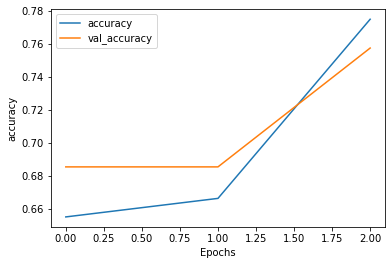

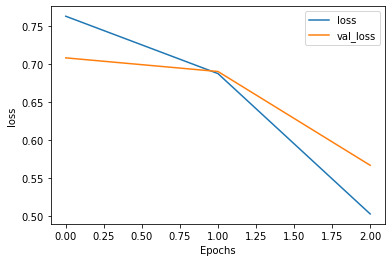

In [32]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [33]:
sentence = ["জায়গাটা অনেক অপরিষ্কার"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.22358437 0.0111331  0.7652826 ]]


In [34]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) 

(3000, 32)


In [35]:
y_pred = model.predict_classes(testing_padded)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [36]:
y_pred[40]

2

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(testing_labels, y_pred))

[[ 78   0  67]
 [  4   0   8]
 [ 42   0 300]]


In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(testing_labels,y_pred)

0.7575150300601202

In [40]:
print(classification_report(testing_labels,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58       145
           1       0.00      0.00      0.00        12
           2       0.80      0.88      0.84       342

    accuracy                           0.76       499
   macro avg       0.48      0.47      0.47       499
weighted avg       0.73      0.76      0.74       499



C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\subor\.conda\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
